<a href="https://colab.research.google.com/github/6FAN/EMail-or-SMS-Spam-Classifier/blob/main/Email_or_SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index
* 01: IMPORTING LIBRARIES
* 02: LOADING DATA
* 03: Data Cleaning
* 04: Label Encoder
* 05: Exploratory Data Analysis(EDA)
* 06: Text Preprocessing
* 07: Model Building
* 08: Result

# 01: IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_theme('paper')
palet = sns.color_palette("Set2")
sns.set_palette(palet)

# 02: LOADING DATA

In [2]:
df = pd.read_csv('/content/spam_2.csv')
df.sample(3)

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3194,3194,ham,Great. P diddy is my neighbor and comes for to...,NaN,NaN,NaN
3095,3095,ham,We walked from my moms. Right on stagwood pass...,NaN,NaN,NaN
118,118,ham,Hmm...my uncle just informed me that he's payi...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 6)

# 03: Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [5]:
#Droping unwanted columns
col = ['Unnamed: 0',
       'Unnamed: 2',
       'Unnamed: 3',
       'Unnamed: 4']
df = df.drop(columns=col,
             axis=1)

In [6]:
#First 5 data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Last five data
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will \xcc_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
#Renameing a columns
df.rename(columns={'v1':'Target', 'v2':'text'}, inplace=True)

In [9]:
df.describe(include='object')

,Target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# 04: Label Encoder

Encoding a ham as 0, and spam as 1

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.sample(3)

,Target,text
43,0,WHO ARE YOU SEEING?
1603,0,Have you heard about that job? I'm going to th...
2139,0,But i juz remembered i gotta bathe my dog today..


In [13]:
#missing value
df.isnull().sum()

Target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
#Removing a duplicated values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 05: Exploratory Data Analysis(EDA)

In [17]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

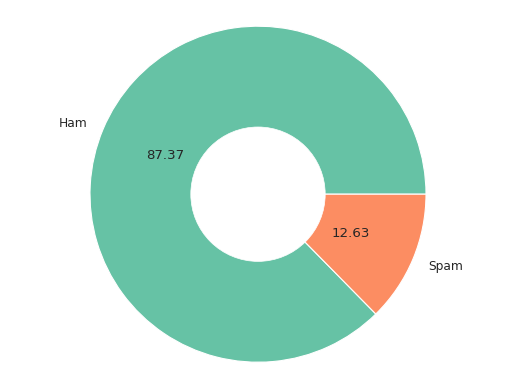

In [18]:
#pieChart
fig, ax = plt.subplots()
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f')

ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.4, fc='white', linewidth=0.5)

fig.gca().add_artist(centre_circle)

plt.show()

**Data is Imbalanced**

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#calculate number of character
df['Num_Character'] = df['text'].apply(len)
df.head()

,Target,text,Num_Character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#Num of Word

In [23]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, \xcc_, b, going, to, esplanade, fr, hom...
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [25]:
df['Num_Words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Target,text,Num_Character,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# Number of Sentences

In [27]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568           [Will \xcc_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [28]:
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [29]:
df['Num_Sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,text,Num_Character,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df.describe()

,Target,Num_Character,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,79.592571,18.456761,1.966531
std,0.332253,58.688831,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [32]:
# Ham
df[df['Target'] == 0].describe()

,Target,Num_Character,Num_Words,Num_Sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.798494,17.123782,1.820195
std,0.0,56.482474,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [33]:
#Only in Spam Messeges
df[df['Target'] == 1].describe()

,Target,Num_Character,Num_Words,Num_Sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,140.410413,27.675345,2.978560
std,0.0,31.131770,7.011513,1.493185
min,1.0,13.000000,2.000000,1.000000
25%,1.0,133.000000,25.000000,2.000000
50%,1.0,151.000000,29.000000,3.000000
75%,1.0,160.000000,32.000000,4.000000
max,1.0,230.000000,46.000000,9.000000


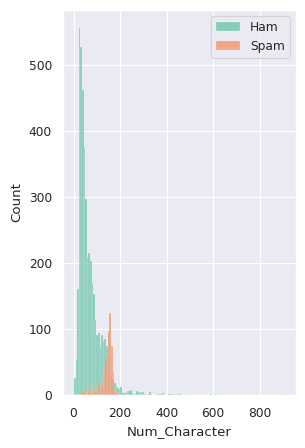

In [34]:
plt.figure(figsize=(3, 5))
sns.histplot(df[df['Target'] == 0]['Num_Character'])
sns.histplot(df[df['Target'] == 1]['Num_Character'])

plt.legend(['Ham', 'Spam'])
plt.show()

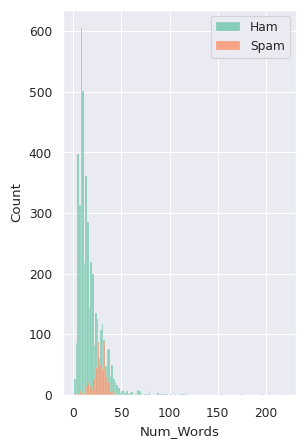

In [35]:
plt.figure(figsize=(3, 5))
sns.histplot(df[df['Target'] == 0]['Num_Words'])
sns.histplot(df[df['Target'] == 1]['Num_Words'])

plt.legend(['Ham', 'Spam'])
plt.show()

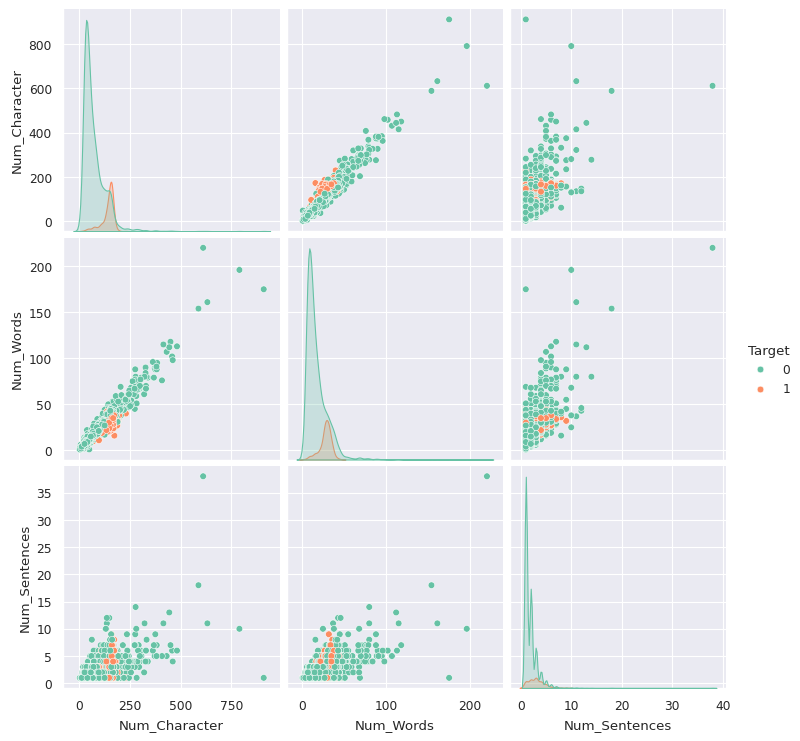

In [36]:
sns.pairplot(data=df, hue='Target')
plt.show()

In [37]:
cor_df = df[['Target', 'Num_Character', 'Num_Words', 'Num_Sentences']]

In [38]:
cor_df.corr()

,Target,Num_Character,Num_Words,Num_Sentences
Target,1.000000,0.394092,0.263086,0.265459
Num_Character,0.394092,1.000000,0.963264,0.623631
Num_Words,0.263086,0.963264,1.000000,0.680021
Num_Sentences,0.265459,0.623631,0.680021,1.000000


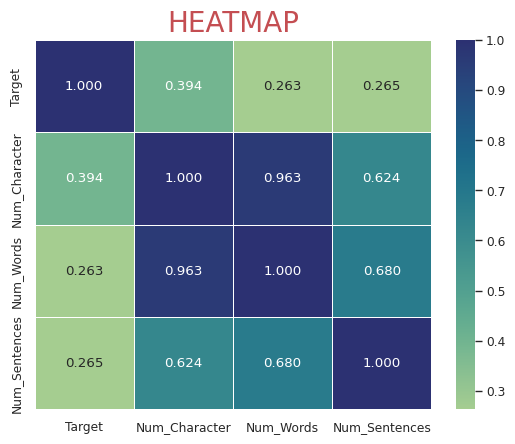

In [39]:
sns.heatmap(data=cor_df.corr(), annot=True, fmt='.3f', linewidths=0.5, cmap=sns.color_palette("crest", as_cmap=True))
plt.title('HeatMap'.upper(), color='r', fontsize=20)
plt.show()

We are taking a 'Num_Character' because high correlation

# 06: Text Preprocessing

* Lower Case
* Tokenization
* Removing Special Characters
* Removing stop words and punctuation
* Stemming

In [40]:
from nltk.corpus import stopwords
import string

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [45]:
def transform_text(text):
    #Lower Case
    text = text.lower()

    #Tokenization
    text = nltk.word_tokenize(text)

    #Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    #Removing stop words and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [46]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [47]:
df['Transformed_text'] = df['text'].apply(transform_text)
df.head()

,Target,text,Num_Character,Num_Words,Num_Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
#Taking a most 30 used words in spam

In [49]:
#converting a Transformed_text as list
a = df[df['Target']==1]['Transformed_text'].tolist()

In [50]:
spam_corpus = []
for msg in a:
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
#Total Words
len(spam_corpus)

9941

In [52]:
#This  library create a dict
from collections import Counter
most_30 = Counter(spam_corpus).most_common(30)
most_30

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [53]:
most_30_df = pd.DataFrame(most_30)
most_30_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


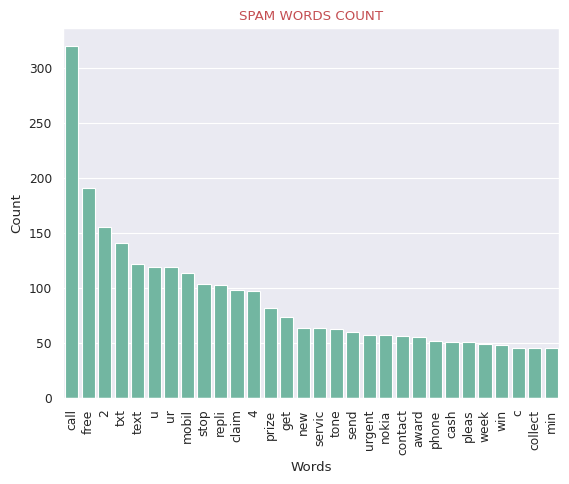

In [54]:
sns.barplot(data=most_30_df, x=most_30_df[0], y=most_30_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Spam Words Count'.upper(), color='r')
plt.show()

In [55]:
#Taking a most 30 used words in ham

In [56]:
b = df[df['Target']==0]['Transformed_text'].tolist()

In [57]:
ham_corpus = []
for msg in b:
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35305

In [59]:
ham_30 = Counter(ham_corpus).most_common(30)
ham_30

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [60]:
ham_30_df = pd.DataFrame(ham_30)
ham_30_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


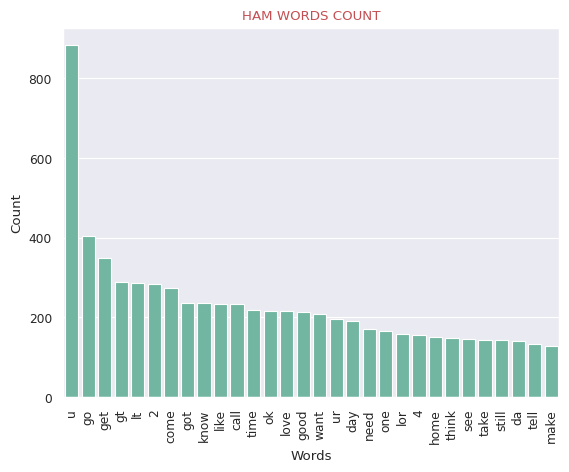

In [61]:
sns.barplot(data=ham_30_df, x=ham_30_df[0], y=ham_30_df[1])
plt.xticks(rotation = 'vertical')
plt.title('Ham Words Count'.upper(), color='r')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

# 07: Model Building

* In this model we get more precision_score is great becuse of data imbalance.

* Here we are useing a naive_bayes becuse it work great in text.

**7.1: Method Of BagOfWords**

In [62]:
#Converting a text to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [63]:
x = cv.fit_transform(df['Transformed_text']).toarray()

In [64]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y = df['Target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(x_train, y_train)
y_pred_01 = gnb.predict(x_test)
cv_acc_scr_gnb = accuracy_score(y_test, y_pred_01)
cv_con_mat_gnb = confusion_matrix(y_test, y_pred_01)
cv_pre_scr_gnb = precision_score(y_test, y_pred_01)

In [72]:
print('_'*30)
print('In The Method Of CountVectorizer')
print('_'*30)
print(f'Accuracy Score in GaussianNB: \n{(cv_acc_scr_gnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in GaussianNB: \n{cv_con_mat_gnb}')
print('_'*30)
print(f'Precision Score in GaussianNB: \n{(cv_pre_scr_gnb*100):.2f}%')

______________________________
In The Method Of CountVectorizer
______________________________
Accuracy Score in GaussianNB: 
 87.81%
______________________________
Confusion Matrix in GaussianNB: 
[[790 106]
 [ 20 118]]
______________________________
Precision Score in GaussianNB: 
52.68%


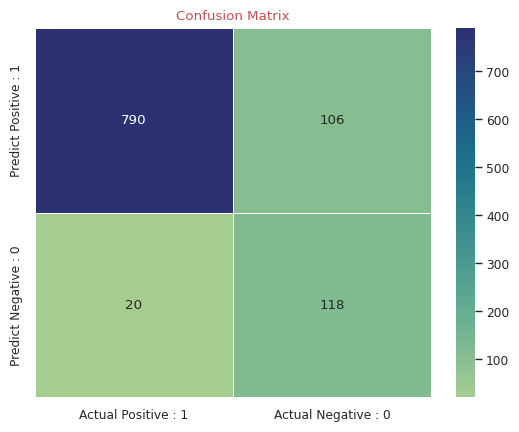

In [73]:
cmap = sns.color_palette("crest", as_cmap=True)

cm_mat_01 = pd.DataFrame(data=cv_con_mat_gnb,
    columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_01, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

In [74]:
mnb.fit(x_train, y_train)
y_pred_02 = mnb.predict(x_test)
cv_acc_scr_mnb = accuracy_score(y_test, y_pred_02)
cv_con_mat_mnb = confusion_matrix(y_test, y_pred_02)
cv_pre_scr_mnb = precision_score(y_test, y_pred_02)

In [75]:
print('_'*30)
print('In The Method Of CountVectorizer')
print('_'*30)
print(f'Accuracy Score in Multinomial: \n{(cv_acc_scr_mnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in Multinomial: \n{cv_con_mat_mnb}')
print('_'*30)
print(f'Precision Score in Multinomial: \n{(cv_pre_scr_mnb*100):.2f}%')

______________________________
In The Method Of CountVectorizer
______________________________
Accuracy Score in Multinomial: 
 96.52%
______________________________
Confusion Matrix in Multinomial: 
[[872  24]
 [ 12 126]]
______________________________
Precision Score in Multinomial: 
84.00%


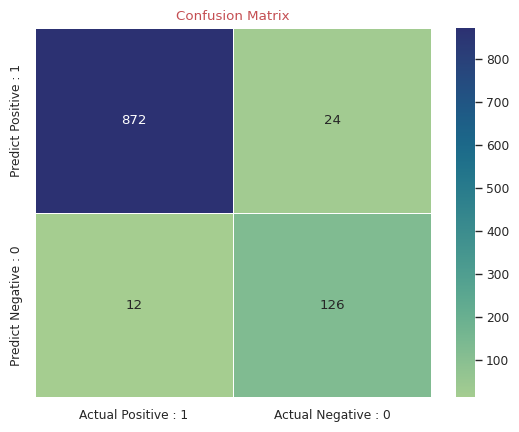

In [76]:
cm_mat_02 = pd.DataFrame(data=cv_con_mat_mnb, columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_02, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

In [77]:
bnb.fit(x_train, y_train)
y_pred_03 = bnb.predict(x_test)
cv_acc_scr_bnb = accuracy_score(y_test, y_pred_03)
cv_con_mat_bnb = confusion_matrix(y_test, y_pred_03)
cv_pre_scr_bnb = precision_score(y_test, y_pred_03)

In [78]:
print('_'*30)
print('In The Method Of CountVectorizer')
print('_'*30)
print(f'Accuracy Score in Bernoulli: \n{(cv_acc_scr_bnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in Bernoulli: \n{cv_con_mat_bnb}')
print('_'*30)
print(f'Precision Score in Bernoulli: \n{(cv_pre_scr_bnb*100):.2f}%')

______________________________
In The Method Of CountVectorizer
______________________________
Accuracy Score in Bernoulli: 
 97.20%
______________________________
Confusion Matrix in Bernoulli: 
[[894   2]
 [ 27 111]]
______________________________
Precision Score in Bernoulli: 
98.23%


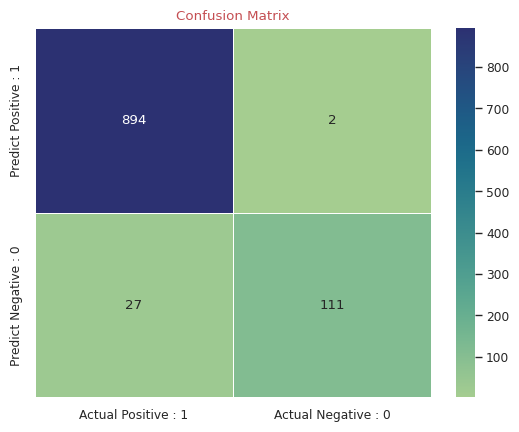

In [79]:
cm_mat_03 = pd.DataFrame(data=cv_con_mat_bnb,
    columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_03, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

**7.2: method of TfidfVectorizer**

In [80]:

#Converting a text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf = TfidfVectorizer()

In [82]:
x = tfidf.fit_transform(df['Transformed_text']).toarray()

In [83]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
y = df['Target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [87]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(x_train, y_train)
y_pred_11 = gnb.predict(x_test)
tf_acc_scr_gnb = accuracy_score(y_test, y_pred_11)
tf_con_mat_gnb = confusion_matrix(y_test, y_pred_11)
tf_pre_scr_gnb = precision_score(y_test, y_pred_11)

In [89]:
print('_'*30)
print('The Method Of TfidfVectorizer')
print('_'*30)
print(f'Accuracy Score in GaussianNB: \n{(tf_acc_scr_gnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in GaussianNB: \n{tf_con_mat_gnb}')
print('_'*30)
print(f'Precision Score in GaussianNB: \n{(tf_pre_scr_gnb*100):.2f}%')

______________________________
The Method Of TfidfVectorizer
______________________________
Accuracy Score in GaussianNB: 
 87.43%
______________________________
Confusion Matrix in GaussianNB: 
[[791 105]
 [ 25 113]]
______________________________
Precision Score in GaussianNB: 
51.83%


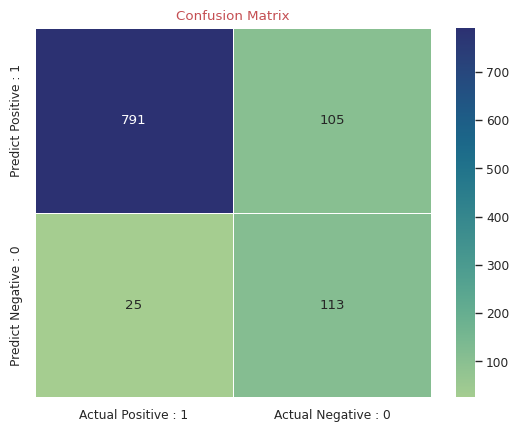

In [90]:
cm_mat_04 = pd.DataFrame(data=tf_con_mat_gnb,
    columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_04, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

In [91]:
mnb.fit(x_train, y_train)
y_pred_12 = mnb.predict(x_test)
tf_acc_scr_mnb = accuracy_score(y_test, y_pred_12)
tf_con_mat_mnb = confusion_matrix(y_test, y_pred_12)
tf_pre_scr_mnb = precision_score(y_test, y_pred_12)

In [92]:
print('_'*30)
print('The Method Of TfidfVectorizer')
print('_'*30)
print(f'Accuracy Score in Multinomial: \n{(tf_acc_scr_mnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in Multinomial: \n{tf_con_mat_mnb}')
print('_'*30)
print(f'Precision Score in Multinomial: \n{(tf_pre_scr_mnb*100):.2f}%')

______________________________
The Method Of TfidfVectorizer
______________________________
Accuracy Score in Multinomial: 
 95.94%
______________________________
Confusion Matrix in Multinomial: 
[[896   0]
 [ 42  96]]
______________________________
Precision Score in Multinomial: 
100.00%


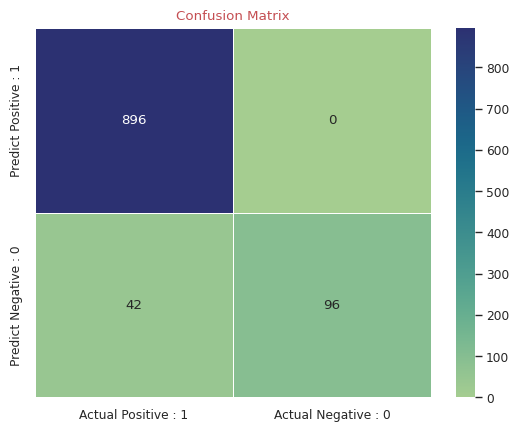

In [93]:
cm_mat_05 = pd.DataFrame(data=tf_con_mat_mnb,
    columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_05, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

In [94]:
bnb.fit(x_train, y_train)
y_pred_13 = bnb.predict(x_test)
tf_acc_scr_bnb = accuracy_score(y_test, y_pred_13)
tf_con_mat_bnb = confusion_matrix(y_test, y_pred_13)
tf_pre_scr_bnb = precision_score(y_test, y_pred_13)

In [95]:
print('_'*30)
print('The Method Of TfidfVectorizer')
print('_'*30)
print(f'Accuracy Score in Bernoulli: \n{(tf_acc_scr_bnb*100): .2f}%')
print('_'*30)
print(f'Confusion Matrix in Bernoulli: \n{tf_con_mat_bnb}')
print('_'*30)
print(f'Precision Score in Bernoulli: \n{(tf_pre_scr_bnb*100):.2f}%')

______________________________
The Method Of TfidfVectorizer
______________________________
Accuracy Score in Bernoulli: 
 97.20%
______________________________
Confusion Matrix in Bernoulli: 
[[894   2]
 [ 27 111]]
______________________________
Precision Score in Bernoulli: 
98.23%


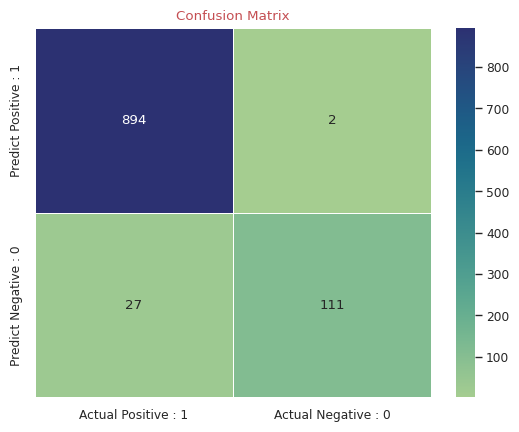

In [96]:
cm_mat_06 = pd.DataFrame(data=tf_con_mat_bnb,
    columns=[
    'Actual Positive : 1',
    'Actual Negative : 0'
],index=[
    'Predict Positive : 1',
    'Predict Negative : 0'
])



sns.heatmap(data=cm_mat_06, annot=True, linewidths=0.5, fmt='d', cmap=cmap)
plt.title('Confusion Matrix', color='r')
plt.show()

# 08: Result

In [97]:
data = [
    [cv_acc_scr_gnb, cv_acc_scr_mnb, cv_acc_scr_bnb],
    [tf_acc_scr_gnb, tf_acc_scr_mnb, tf_acc_scr_bnb],
    [cv_pre_scr_gnb, cv_pre_scr_mnb, cv_pre_scr_bnb],
    [tf_pre_scr_gnb, tf_pre_scr_mnb, tf_pre_scr_bnb]
]
colum = ['gnb', 'mnb', 'bnb']
index = ['Cv Accuracy Score',
         'Tf Accuracy Score',
         'Cv Precision Score',
         'Tf Precision Score']

In [98]:
result_df = pd.DataFrame(data = data,
            index=index,
            columns=colum).T
result_df

,Cv Accuracy Score,Tf Accuracy Score,Cv Precision Score,Tf Precision Score
gnb,0.878143,0.874275,0.526786,0.518349
mnb,0.965184,0.959381,0.840000,1.000000
bnb,0.971954,0.971954,0.982301,0.982301


In [99]:
result_df = result_df.apply(lambda x: x*100)

In [100]:
result_df

,Cv Accuracy Score,Tf Accuracy Score,Cv Precision Score,Tf Precision Score
gnb,87.814313,87.427466,52.678571,51.834862
mnb,96.518375,95.938104,84.000000,100.000000
bnb,97.195358,97.195358,98.230088,98.230088


we are taking a model Multinomial in that TfidfVectorizer method becuse of good precision score.